# Marketing Insights for E-Commerce Company

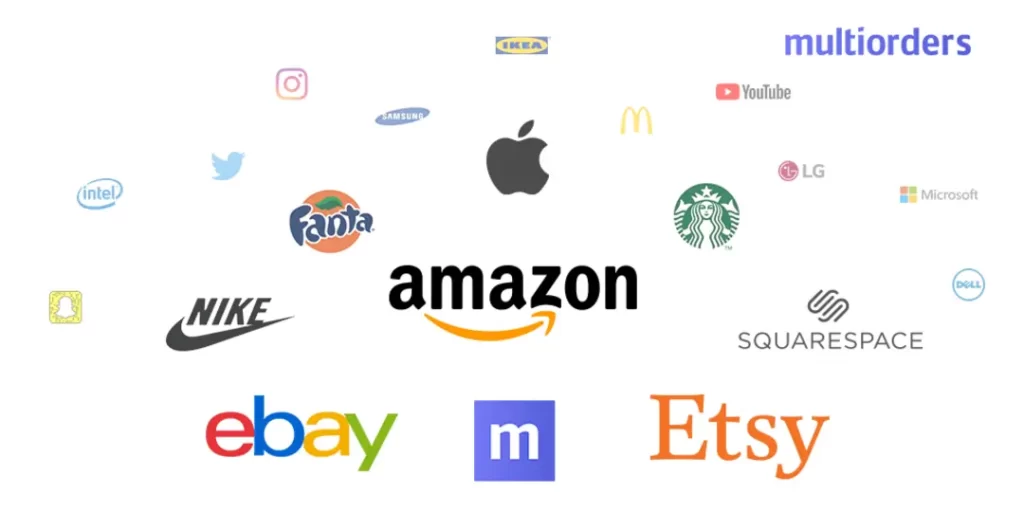

# Problem statement:
A rapidly growing e-commerce company aims to transition from intuition-based marketing to a data-driven approach. By analyzing customer demographics, transaction data, marketing spend, and discount details from 2019, the company seeks to gain a comprehensive understanding of customer behavior. The objectives are to optimize marketing campaigns across various channels, leverage data insights to enhance customer retention, predict customer lifetime value, and ultimately drive sustainable revenue growth.

# Expectations:

- Identifying key customer segments and behaviors: Utilizing descriptive statistics and segmentation techniques to understand what drives customer acquisition and churn.
- Evaluating marketing campaign effectiveness: Employing hypothesis testing to assess the impact of online and offline marketing efforts on customer behavior and revenue.
- Optimizing discount strategies: Analyzing the influence of discounts and promotions on revenue and customer engagement to identify optimal pricing strategies.
- Predicting customer lifetime value: Implementing data-driven models to anticipate future customer value and prioritize retention efforts.
- Unveiling cross-selling opportunities: Performing market basket analysis to discover frequently co-purchased products and inform product placement strategies.
- Formulating data-driven recommendations: Presenting clear and compelling visualizations and reports that translate insights into actionable marketing strategies for maximizing customer retention and revenue growth.

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy.stats import chi2_contingency, ttest_ind
print("Setup Complete!")

Setup Complete!


## Getting Data

In [173]:
cust=pd.read_csv(r"D:\DSML\Case Studies\E Commerce\Customers.csv")
cust.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [174]:
discount=pd.read_csv(r"D:\DSML\Case Studies\E Commerce\Discount_Coupon.csv")
discount.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [175]:
spend=pd.read_csv(r"D:\DSML\Case Studies\E Commerce\Marketing_Spend.csv")
spend.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [176]:
online_sales=pd.read_csv(r'D:\DSML\Case Studies\E Commerce\Online_Sales.csv')
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [177]:
tax_amt=pd.read_csv(r'D:\DSML\Case Studies\E Commerce\Tax_amount.csv')
tax_amt.head()

,Product_Category,GST
0,Nest-USA,10%
1,Office,10%
2,Apparel,18%
3,Bags,18%
4,Drinkware,18%


# Understanding the relationship between dataframes so that we can merge them

- online sales and tax amt---product category
- online sales and customer-----customer id
- tax amt and discount coupon----product category

## Merging the Dataframes for better control

In [178]:
online_sales_cust =pd.merge(online_sales, cust, on = "CustomerID", how = "left")
o_c_t =pd.merge(online_sales_cust, tax_amt, on = "Product_Category", how="left")
o_c_t.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,GST
0,17850,16679,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,10%
1,17850,16680,1/1/2019,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,10%
2,17850,16681,1/1/2019,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,10%
3,17850,16682,1/1/2019,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,M,Chicago,12,18%
4,17850,16682,1/1/2019,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12,18%


In [179]:
o_c_t['Transaction_Date'] = pd.to_datetime(o_c_t['Transaction_Date'], format="%m/%d/%Y")
o_c_t['tx_month'] = o_c_t['Transaction_Date'].dt.strftime("%b")

In [180]:
discount.rename({'Product_Category ':'Product_Category'},axis='columns',inplace=True)
df =pd.merge(o_c_t, discount, left_on= ['tx_month', 'Product_Category'], right_on = ['Month', 'Product_Category' ], how = "inner")
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,GST,tx_month,Month,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,10%,Jan,Jan,ELEC10,10
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,10%,Jan,Jan,ELEC10,10
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,10%,Jan,Jan,OFF10,10
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,M,Chicago,12,18%,Jan,Jan,SALE10,10
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12,18%,Jan,Jan,AIO10,10


In [181]:
df.drop("tx_month", axis= 1, inplace=True)

## Basic EDA

In [182]:
df.shape

(52524, 17)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52524 entries, 0 to 52523
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52524 non-null  int64         
 1   Transaction_ID       52524 non-null  int64         
 2   Transaction_Date     52524 non-null  datetime64[ns]
 3   Product_SKU          52524 non-null  object        
 4   Product_Description  52524 non-null  object        
 5   Product_Category     52524 non-null  object        
 6   Quantity             52524 non-null  int64         
 7   Avg_Price            52524 non-null  float64       
 8   Delivery_Charges     52524 non-null  float64       
 9   Coupon_Status        52524 non-null  object        
 10  Gender               52524 non-null  object        
 11  Location             52524 non-null  object        
 12  Tenure_Months        52524 non-null  int64         
 13  GST                  52524 non-

In [184]:
df.isna().sum()

CustomerID             0
Transaction_ID         0
Transaction_Date       0
Product_SKU            0
Product_Description    0
Product_Category       0
Quantity               0
Avg_Price              0
Delivery_Charges       0
Coupon_Status          0
Gender                 0
Location               0
Tenure_Months          0
GST                    0
Month                  0
Coupon_Code            0
Discount_pct           0
dtype: int64

In [185]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Gender', 'Location',
       'Tenure_Months', 'GST', 'Month', 'Coupon_Code', 'Discount_pct'],
      dtype='object')

In [186]:
df.duplicated().sum()

0

## Data Cleaning 

In [187]:
spend['Date']=spend['Date'].apply(lambda x:pd.to_datetime(x))
spend.head()

,Date,Offline_Spend,Online_Spend
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


### Quantifying the data for continuous variables and categorical values

In [188]:
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [189]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

### Dealing with missing values

In [190]:
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64') |(x.dtypes == 'int32') | (x.dtypes == 'float32'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode().iloc[0])
    return x

In [191]:
for x in ['Product_Category','Product_Description', 'Product_SKU','Coupon_Status',"Gender" ,"Coupon_Code"]:
    df[x]=df[x].astype('object')

In [192]:
# Separate numerical and categorical variable
# Find numerical variable in Data frame.
# This will return a list
numeric_var_names = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

# Find Categorical variable in Data frame
cat_var_names = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]

#Print the data frame
print( numeric_var_names)
print(cat_var_names)

['CustomerID', 'Transaction_ID', 'Quantity', 'Avg_Price', 'Delivery_Charges', 'Tenure_Months', 'Discount_pct']
['Product_SKU', 'Product_Description', 'Product_Category', 'Coupon_Status', 'Gender', 'Location', 'GST', 'Month', 'Coupon_Code']


In [193]:
#Convert a list in to dataframe 
#Information about numericvariable in custdata_df
df_num=df[numeric_var_names]
df_num

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct
0,17850,16679,1,153.71,6.50,12,10
1,17850,16680,1,153.71,6.50,12,10
2,17850,16681,1,2.05,6.50,12,10
3,17850,16682,5,17.53,6.50,12,10
4,17850,16682,1,16.50,6.50,12,10
...,...,...,...,...,...,...,...
52519,14410,48493,1,121.30,6.50,45,30
52520,14410,48494,1,48.92,6.50,45,30
52521,14410,48495,1,151.88,6.50,45,30
52522,14600,48496,5,80.52,6.50,7,30


In [194]:
#Convert a list in to dataframe 
#Information about categorical variable in custdata_df
df_cat=df[cat_var_names]
df_cat.head()

,Product_SKU,Product_Description,Product_Category,Coupon_Status,Gender,Location,GST,Month,Coupon_Code
0,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,Used,M,Chicago,10%,Jan,ELEC10
1,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,Used,M,Chicago,10%,Jan,ELEC10
2,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,Used,M,Chicago,10%,Jan,OFF10
3,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,Not Used,M,Chicago,18%,Jan,SALE10
4,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,Used,M,Chicago,18%,Jan,AIO10


In [195]:
df_num.isna().sum()

CustomerID          0
Transaction_ID      0
Quantity            0
Avg_Price           0
Delivery_Charges    0
Tenure_Months       0
Discount_pct        0
dtype: int64

In [196]:
df_cat.isna().sum()

Product_SKU            0
Product_Description    0
Product_Category       0
Coupon_Status          0
Gender                 0
Location               0
GST                    0
Month                  0
Coupon_Code            0
dtype: int64

In [197]:
df_cat.nunique()

Product_SKU            1135
Product_Description     395
Product_Category         16
Coupon_Status             3
Gender                    2
Location                  5
GST                       4
Month                    12
Coupon_Code              45
dtype: int64

In [198]:
# We need to create a function for dummy creation
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname)
    col_dummies.drop(col_dummies.columns[0], axis = 1, inplace = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True)
    return df

In [199]:
df_cat

,Product_SKU,Product_Description,Product_Category,Coupon_Status,Gender,Location,GST,Month,Coupon_Code
0,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,Used,M,Chicago,10%,Jan,ELEC10
1,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,Used,M,Chicago,10%,Jan,ELEC10
2,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,Used,M,Chicago,10%,Jan,OFF10
3,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,Not Used,M,Chicago,18%,Jan,SALE10
4,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,Used,M,Chicago,18%,Jan,AIO10
...,...,...,...,...,...,...,...,...,...
52519,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,Clicked,F,New York,10%,Dec,ELEC30
52520,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,Used,F,New York,18%,Dec,SALE30
52521,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,Used,F,New York,10%,Dec,ELEC30
52522,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,Clicked,F,California,10%,Dec,ELEC30


In [200]:
df_cat2 =df_cat.iloc[ :, [0,1,6,7]]
df_cat2

,Product_SKU,Product_Description,GST,Month
0,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10%,Jan
1,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10%,Jan
2,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,10%,Jan
3,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,18%,Jan
4,GGOEGBJL013999,Google Canvas Tote Natural/Navy,18%,Jan
...,...,...,...,...
52519,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,10%,Dec
52520,GGOEGAEB091117,Google Zip Hoodie Black,18%,Dec
52521,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,10%,Dec
52522,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,10%,Dec


In [201]:
df_cat1 = df_cat.iloc[ :,[2,3,4,5]]
df_cat1

,Product_Category,Coupon_Status,Gender,Location
0,Nest-USA,Used,M,Chicago
1,Nest-USA,Used,M,Chicago
2,Office,Used,M,Chicago
3,Apparel,Not Used,M,Chicago
4,Bags,Used,M,Chicago
...,...,...,...,...
52519,Nest-USA,Clicked,F,New York
52520,Apparel,Used,F,New York
52521,Nest-USA,Used,F,New York
52522,Nest-USA,Clicked,F,California


In [202]:
cat_varlist=list(df_cat1.columns)
cat_varlist

['Product_Category', 'Coupon_Status', 'Gender', 'Location']

In [203]:
# For customer_features in categorical features

for c_feature in cat_varlist:
    df_cat1[c_feature]=df_cat1[c_feature].astype('category')
    df_cat1=create_dummies(df_cat1,c_feature)

C:\Users\tripa\AppData\Local\Temp\ipykernel_24444\1526535554.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat1[c_feature]=df_cat1[c_feature].astype('category')


In [204]:
df_cat1.sample(5)

,Product_Category_Android,Product_Category_Apparel,Product_Category_Bags,Product_Category_Bottles,Product_Category_Drinkware,Product_Category_Gift Cards,Product_Category_Headgear,Product_Category_Housewares,Product_Category_Lifestyle,Product_Category_Nest,...,Product_Category_Notebooks & Journals,Product_Category_Office,Product_Category_Waze,Coupon_Status_Not Used,Coupon_Status_Used,Gender_M,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
41356,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
19096,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,True
5061,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10475,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
39398,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [205]:
## Merge Numerical and categorical data
df_fin = pd.concat([df_num, df_cat1,df_cat2,  df.Transaction_Date], axis=1)
df_fin.head()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Product_Category_Android,Product_Category_Apparel,Product_Category_Bags,...,Gender_M,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,Product_SKU,Product_Description,GST,Month,Transaction_Date
0,17850,16679,1,153.71,6.5,12,10,False,False,False,...,True,True,False,False,False,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10%,Jan,2019-01-01
1,17850,16680,1,153.71,6.5,12,10,False,False,False,...,True,True,False,False,False,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10%,Jan,2019-01-01
2,17850,16681,1,2.05,6.5,12,10,False,False,False,...,True,True,False,False,False,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,10%,Jan,2019-01-01
3,17850,16682,5,17.53,6.5,12,10,False,True,False,...,True,True,False,False,False,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,18%,Jan,2019-01-01
4,17850,16682,1,16.50,6.5,12,10,False,False,True,...,True,True,False,False,False,GGOEGBJL013999,Google Canvas Tote Natural/Navy,18%,Jan,2019-01-01


In [206]:
df_fin.shape

(52524, 34)

In [207]:
df_fin.isna().sum()

CustomerID                               0
Transaction_ID                           0
Quantity                                 0
Avg_Price                                0
Delivery_Charges                         0
Tenure_Months                            0
Discount_pct                             0
Product_Category_Android                 0
Product_Category_Apparel                 0
Product_Category_Bags                    0
Product_Category_Bottles                 0
Product_Category_Drinkware               0
Product_Category_Gift Cards              0
Product_Category_Headgear                0
Product_Category_Housewares              0
Product_Category_Lifestyle               0
Product_Category_Nest                    0
Product_Category_Nest-Canada             0
Product_Category_Nest-USA                0
Product_Category_Notebooks & Journals    0
Product_Category_Office                  0
Product_Category_Waze                    0
Coupon_Status_Not Used                   0
Coupon_Stat

In [208]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52524 entries, 0 to 52523
Data columns (total 34 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   CustomerID                             52524 non-null  int64         
 1   Transaction_ID                         52524 non-null  int64         
 2   Quantity                               52524 non-null  int64         
 3   Avg_Price                              52524 non-null  float64       
 4   Delivery_Charges                       52524 non-null  float64       
 5   Tenure_Months                          52524 non-null  int64         
 6   Discount_pct                           52524 non-null  int64         
 7   Product_Category_Android               52524 non-null  bool          
 8   Product_Category_Apparel               52524 non-null  bool          
 9   Product_Category_Bags                  52524 non-null  bool  

In [209]:
df_fin.duplicated().sum()

0

### Further Data Analysis

### 1.Calculating Invoice Amount/Sale Amount/Revenue

In [210]:
df_fin['GST'] = df_fin['GST'].str.rstrip('%').astype(float)

df_fin['GST'] = df_fin['GST'].astype('int64')

# Invoice Value = ((Quantity Avg_price) (1 - Discount_pct) * (1 + GST)) + Delivery_Charges.
df_fin['Revenue'] = ((df_fin['Quantity']*df_fin['Avg_Price'])*(1-df_fin['Discount_pct']/100)*(1+df_fin['GST']/100))+df_fin['Delivery_Charges']

In [211]:
df_fin[['Quantity','Avg_Price','Discount_pct','GST','Delivery_Charges']]

,Quantity,Avg_Price,Discount_pct,GST,Delivery_Charges
0,1,153.71,10,10,6.50
1,1,153.71,10,10,6.50
2,1,2.05,10,10,6.50
3,5,17.53,10,18,6.50
4,1,16.50,10,18,6.50
...,...,...,...,...,...
52519,1,121.30,30,10,6.50
52520,1,48.92,30,18,6.50
52521,1,151.88,30,10,6.50
52522,5,80.52,30,10,6.50


In [212]:
df_fin.head()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Product_Category_Android,Product_Category_Apparel,Product_Category_Bags,...,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,Product_SKU,Product_Description,GST,Month,Transaction_Date,Revenue
0,17850,16679,1,153.71,6.5,12,10,False,False,False,...,True,False,False,False,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10,Jan,2019-01-01,158.6729
1,17850,16680,1,153.71,6.5,12,10,False,False,False,...,True,False,False,False,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10,Jan,2019-01-01,158.6729
2,17850,16681,1,2.05,6.5,12,10,False,False,False,...,True,False,False,False,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,10,Jan,2019-01-01,8.5295
3,17850,16682,5,17.53,6.5,12,10,False,True,False,...,True,False,False,False,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,18,Jan,2019-01-01,99.5843
4,17850,16682,1,16.50,6.5,12,10,False,False,True,...,True,False,False,False,GGOEGBJL013999,Google Canvas Tote Natural/Navy,18,Jan,2019-01-01,24.0230


## 2.1 How many customers acquired every month?

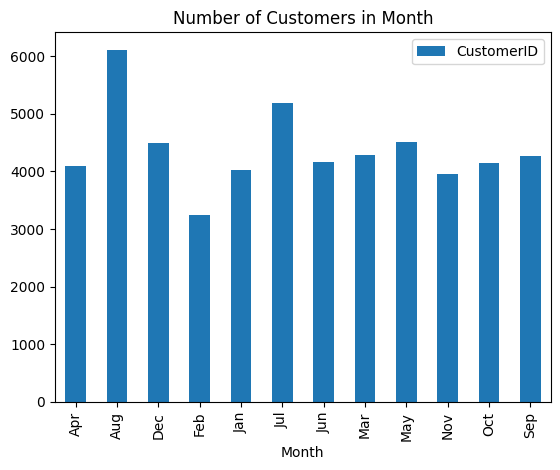

In [213]:
df_fin.groupby(by='Month')[['CustomerID']].count().plot(kind='bar',title='Number of Customers in Month')
plt.show()

### 2.2 The retention of customers on month on month basis ?

In [214]:
df_fin=df_fin.assign(Occurence=np.where(~df_fin['CustomerID'].duplicated(),'New','Existing'))
df_fin.head()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Product_Category_Android,Product_Category_Apparel,Product_Category_Bags,...,Location_New Jersey,Location_New York,Location_Washington DC,Product_SKU,Product_Description,GST,Month,Transaction_Date,Revenue,Occurence
0,17850,16679,1,153.71,6.5,12,10,False,False,False,...,False,False,False,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10,Jan,2019-01-01,158.6729,New
1,17850,16680,1,153.71,6.5,12,10,False,False,False,...,False,False,False,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10,Jan,2019-01-01,158.6729,Existing
2,17850,16681,1,2.05,6.5,12,10,False,False,False,...,False,False,False,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,10,Jan,2019-01-01,8.5295,Existing
3,17850,16682,5,17.53,6.5,12,10,False,True,False,...,False,False,False,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,18,Jan,2019-01-01,99.5843,Existing
4,17850,16682,1,16.50,6.5,12,10,False,False,True,...,False,False,False,GGOEGBJL013999,Google Canvas Tote Natural/Navy,18,Jan,2019-01-01,24.0230,Existing


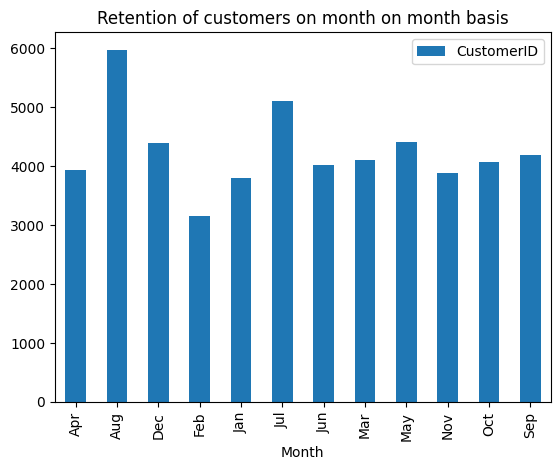

In [215]:
retention_cust=df_fin.loc[(df_fin.Occurence=='Existing')].groupby(by=['Month'])[['CustomerID']].count()
retention_cust.plot(kind='bar',title='Retention of customers on month on month basis')
plt.show()

### 2.3 How revenue changing from new/existing customers on month on month basis?

In [216]:
d=df_fin.loc[df_fin.Occurence=='New']
d.head()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Product_Category_Android,Product_Category_Apparel,Product_Category_Bags,...,Location_New Jersey,Location_New York,Location_Washington DC,Product_SKU,Product_Description,GST,Month,Transaction_Date,Revenue,Occurence
0,17850,16679,1,153.71,6.50,12,10,False,False,False,...,False,False,False,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10,Jan,2019-01-01,158.67290,New
9,13047,16682,52,0.98,6.50,43,10,False,False,False,...,False,False,False,GGOEGGOA017399,Maze Pen,10,Jan,2019-01-01,56.95040,New
26,12583,16692,1,2.47,102.79,33,10,False,False,False,...,False,False,False,GGOEAFKQ020599,Android Sticker Sheet Ultra Removable,10,Jan,2019-01-01,105.23530,New
46,13748,16696,1,1.24,6.50,30,10,False,False,False,...,False,False,False,GGOEGPJC019099,7&quot; Dog Frisbee,18,Jan,2019-01-01,7.81688,New
64,15100,16712,1,153.71,6.50,49,10,False,False,False,...,False,False,False,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10,Jan,2019-01-01,158.67290,New


In [217]:
d['Revenue']

0        158.67290
9         56.95040
26       105.23530
46         7.81688
64       158.67290
           ...    
52451     56.20400
52490    193.30200
52509    123.44760
52514     80.66885
52522    316.50200
Name: Revenue, Length: 1468, dtype: float64

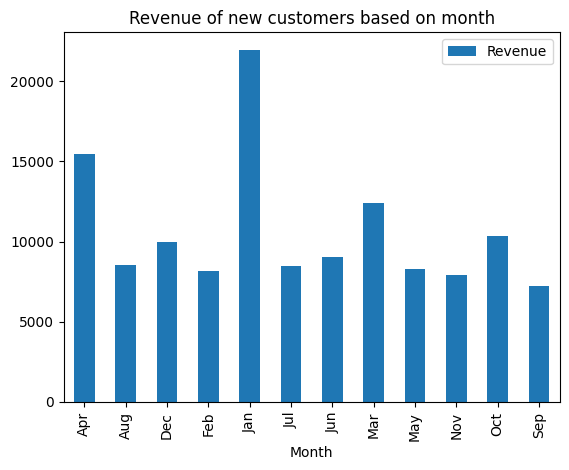

In [218]:
d.groupby(by=['Month'])[['Revenue']].sum().plot(kind='bar',title='Revenue of new customers based on month')
plt.show()

In [219]:
d1=df_fin.loc[df_fin.Occurence=='Existing']
d1.head()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Product_Category_Android,Product_Category_Apparel,Product_Category_Bags,...,Location_New Jersey,Location_New York,Location_Washington DC,Product_SKU,Product_Description,GST,Month,Transaction_Date,Revenue,Occurence
1,17850,16680,1,153.71,6.5,12,10,False,False,False,...,False,False,False,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10,Jan,2019-01-01,158.6729,Existing
2,17850,16681,1,2.05,6.5,12,10,False,False,False,...,False,False,False,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,10,Jan,2019-01-01,8.5295,Existing
3,17850,16682,5,17.53,6.5,12,10,False,True,False,...,False,False,False,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,18,Jan,2019-01-01,99.5843,Existing
4,17850,16682,1,16.50,6.5,12,10,False,False,True,...,False,False,False,GGOEGBJL013999,Google Canvas Tote Natural/Navy,18,Jan,2019-01-01,24.0230,Existing
5,17850,16682,15,5.15,6.5,12,10,False,False,True,...,False,False,False,GGOEGBMJ013399,Sport Bag,18,Jan,2019-01-01,88.5395,Existing


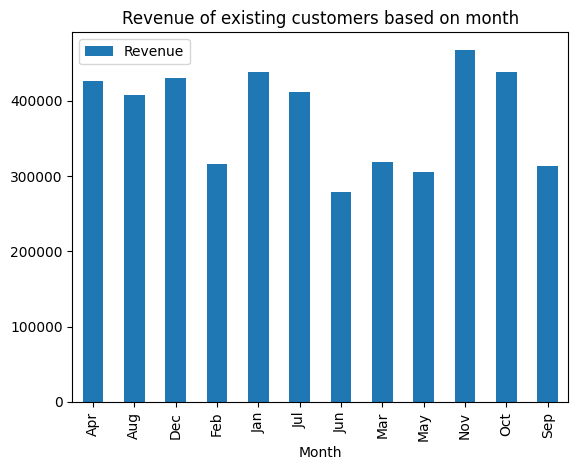

In [220]:
d1.groupby(by=['Month'])[['Revenue']].sum().plot(kind='bar',title='Revenue of existing customers based on month')
plt.show()

### 2.4 How discount is playing the role in revenue

In [221]:
df_fin.groupby(by=['Discount_pct'])[['Revenue']].sum()

,Revenue
Discount_pct,
10,1.770785e+06
20,1.529150e+06
30,1.377627e+06


## 2.5 Analyzing KPI's like Revenue,number of orders,average order value,numbers of customers(new/existing), quantity by category,month,day,week etc..                                                                                                      

## 2.6 Understanding the trends/seasonality of sales by month,location,category etc..

In [222]:
df_fin.Revenue.sum()

4677562.21867

In [223]:
df_fin.Quantity.sum() #number of orders

236367

In [224]:
df1=df_fin.iloc[:,[0,1,17]]
df1.head()

,CustomerID,Transaction_ID,Product_Category_Nest-Canada
0,17850,16679,False
1,17850,16680,False
2,17850,16681,False
3,17850,16682,False
4,17850,16682,False


In [225]:
df1=df.groupby(by=['CustomerID'])[['Transaction_ID']].count()  #finding number of transaction per customer
df1

,Transaction_ID
CustomerID,
12346,2
12347,59
12348,23
12350,17
12356,36
...,...
18259,6
18260,39
18269,8


In [226]:
df1['Avg_order_value']=df_fin['Revenue']/df1['Transaction_ID']  #finding avg_order_value
df1

,Transaction_ID,Avg_order_value
CustomerID,,
12346,2,6.210100
12347,59,5.110508
12348,23,2.269010
12350,17,1.078265
12356,36,3.812596
...,...,...
18259,6,4.741387
18260,39,3.542564
18269,8,1.976020


In [227]:
new_cust=df_fin.loc[df_fin.Occurence=='New']
new_cust.Occurence.count()

1468

In [228]:
ex_cust=df_fin.loc[df_fin.Occurence=='Existing']
ex_cust.Occurence.count()

51056

In [229]:
df.groupby(by='Product_Category')[['Quantity']].sum().sort_values(by='Quantity',ascending=False)

,Quantity
Product_Category,
Office,88383
Apparel,32438
Drinkware,30501
Lifestyle,24881
Nest-USA,21430
Bags,15273
Notebooks & Journals,9556
Headgear,3533
Nest,2837


In [230]:
df_fin['Day']=df_fin.Transaction_Date.apply(lambda x:x.day)
df_fin['Week']=df_fin.Transaction_Date.apply(lambda x:x.week)
df_fin.head()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Product_Category_Android,Product_Category_Apparel,Product_Category_Bags,...,Location_Washington DC,Product_SKU,Product_Description,GST,Month,Transaction_Date,Revenue,Occurence,Day,Week
0,17850,16679,1,153.71,6.5,12,10,False,False,False,...,False,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10,Jan,2019-01-01,158.6729,New,1,1
1,17850,16680,1,153.71,6.5,12,10,False,False,False,...,False,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10,Jan,2019-01-01,158.6729,Existing,1,1
2,17850,16681,1,2.05,6.5,12,10,False,False,False,...,False,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,10,Jan,2019-01-01,8.5295,Existing,1,1
3,17850,16682,5,17.53,6.5,12,10,False,True,False,...,False,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,18,Jan,2019-01-01,99.5843,Existing,1,1
4,17850,16682,1,16.50,6.5,12,10,False,False,True,...,False,GGOEGBJL013999,Google Canvas Tote Natural/Navy,18,Jan,2019-01-01,24.0230,Existing,1,1


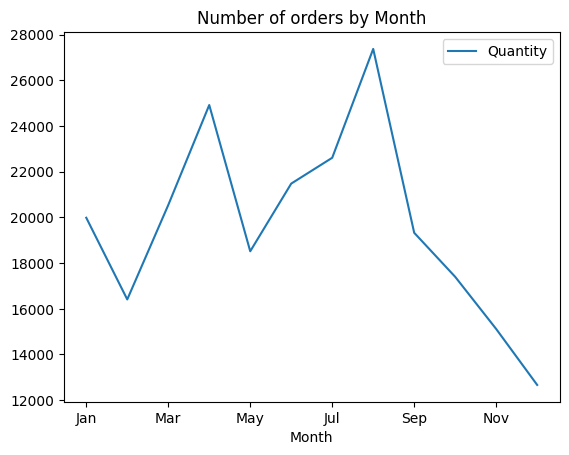

In [231]:
df2=df_fin.groupby(by='Month')[['Quantity']].sum().reset_index()
df2.sort_index()
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df2.index = pd.CategoricalIndex(df2['Month'], categories= sort_order, ordered  = True)
df2 =df2.sort_index()
df2.plot(x='Month', y= 'Quantity', kind ="line",title='Number of orders by Month')
plt.show()


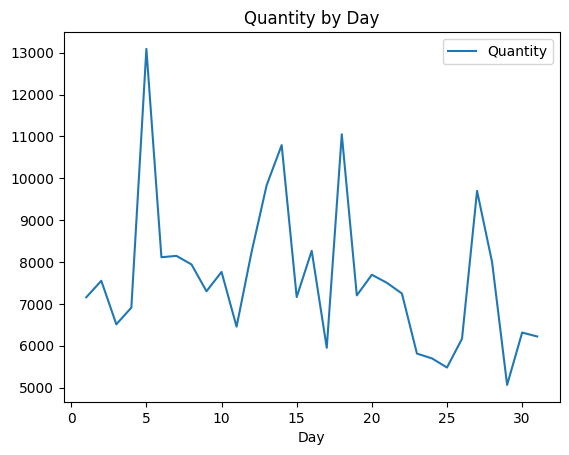

In [232]:
df_fin.groupby(by='Day')[['Quantity']].sum().plot(kind='line',title='Quantity by Day')
plt.show()

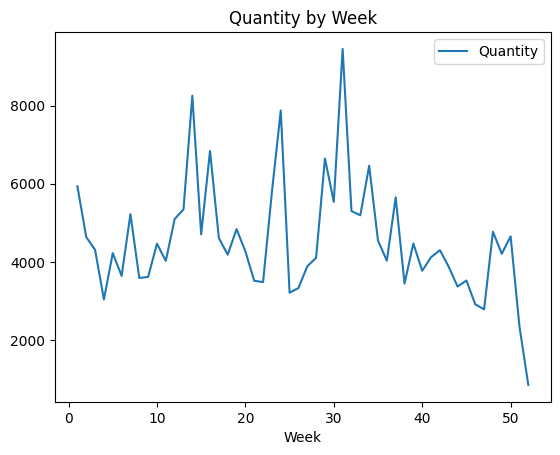

In [233]:
df_fin.groupby(by='Week')[['Quantity']].sum().plot(kind='line',title='Quantity by Week')
plt.show()

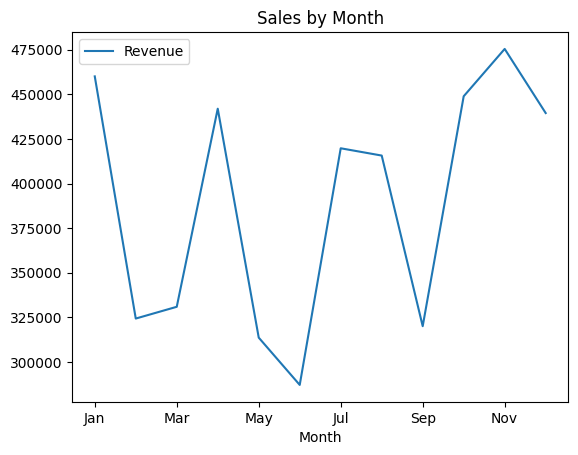

In [234]:
df2=df_fin.groupby(by='Month')[['Revenue']].sum().reset_index()
df2.sort_index()
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df2.index = pd.CategoricalIndex(df2['Month'], categories= sort_order, ordered  = True)
df2 =df2.sort_index()
df2.plot(x='Month', y= 'Revenue', kind ="line",title='Sales by Month')
plt.show()

In [235]:
df['GST'] = df['GST'].str.rstrip('%').astype(float)

df['GST'] = df['GST'].astype('int64')

In [236]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,GST,Month,Coupon_Code,Discount_pct
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,10,Jan,ELEC10,10
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,M,Chicago,12,10,Jan,ELEC10,10
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,M,Chicago,12,10,Jan,OFF10,10
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,M,Chicago,12,18,Jan,SALE10,10
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,M,Chicago,12,18,Jan,AIO10,10


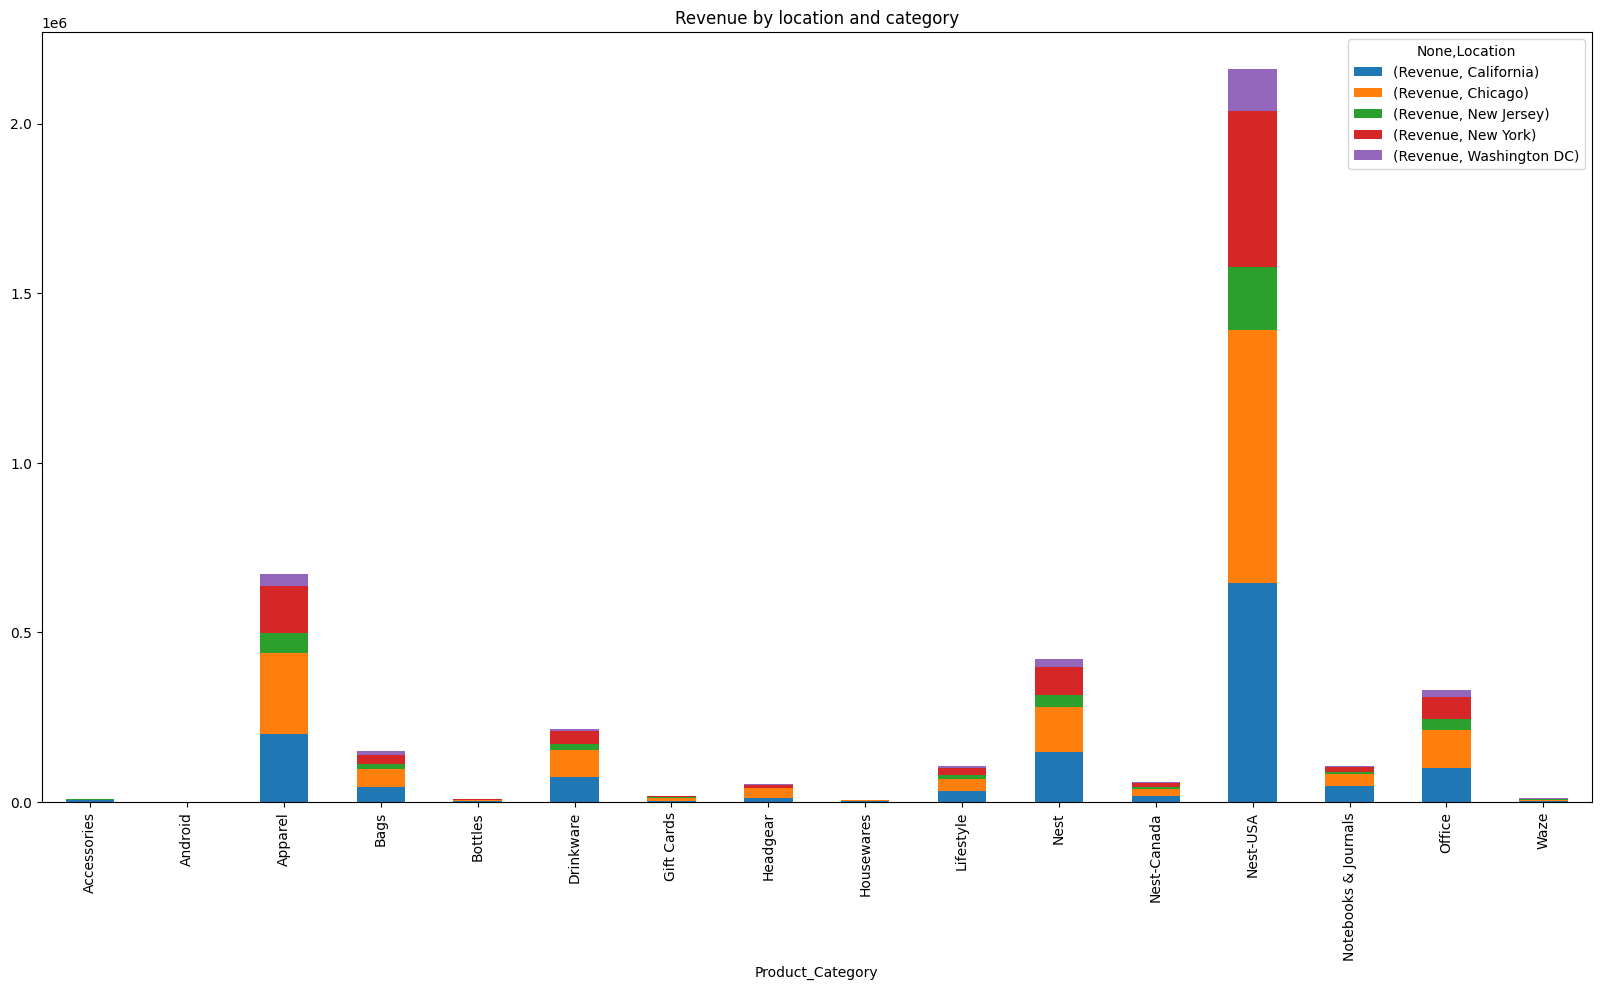

In [237]:
# Calculate Revenue
df['Revenue'] = (df['Quantity'] * df['Avg_Price'] * (1 - df['Discount_pct']/100)) + (1+df['GST']/100) + df['Delivery_Charges']

# Group by Product_Category and Location and sum the Revenue
grouped_df = df.groupby(by=['Product_Category', 'Location'])[['Revenue']].sum().unstack()

# Plot the data
grouped_df.plot(kind='bar', stacked=True, figsize=[20, 10], title='Revenue by location and category')
plt.show()

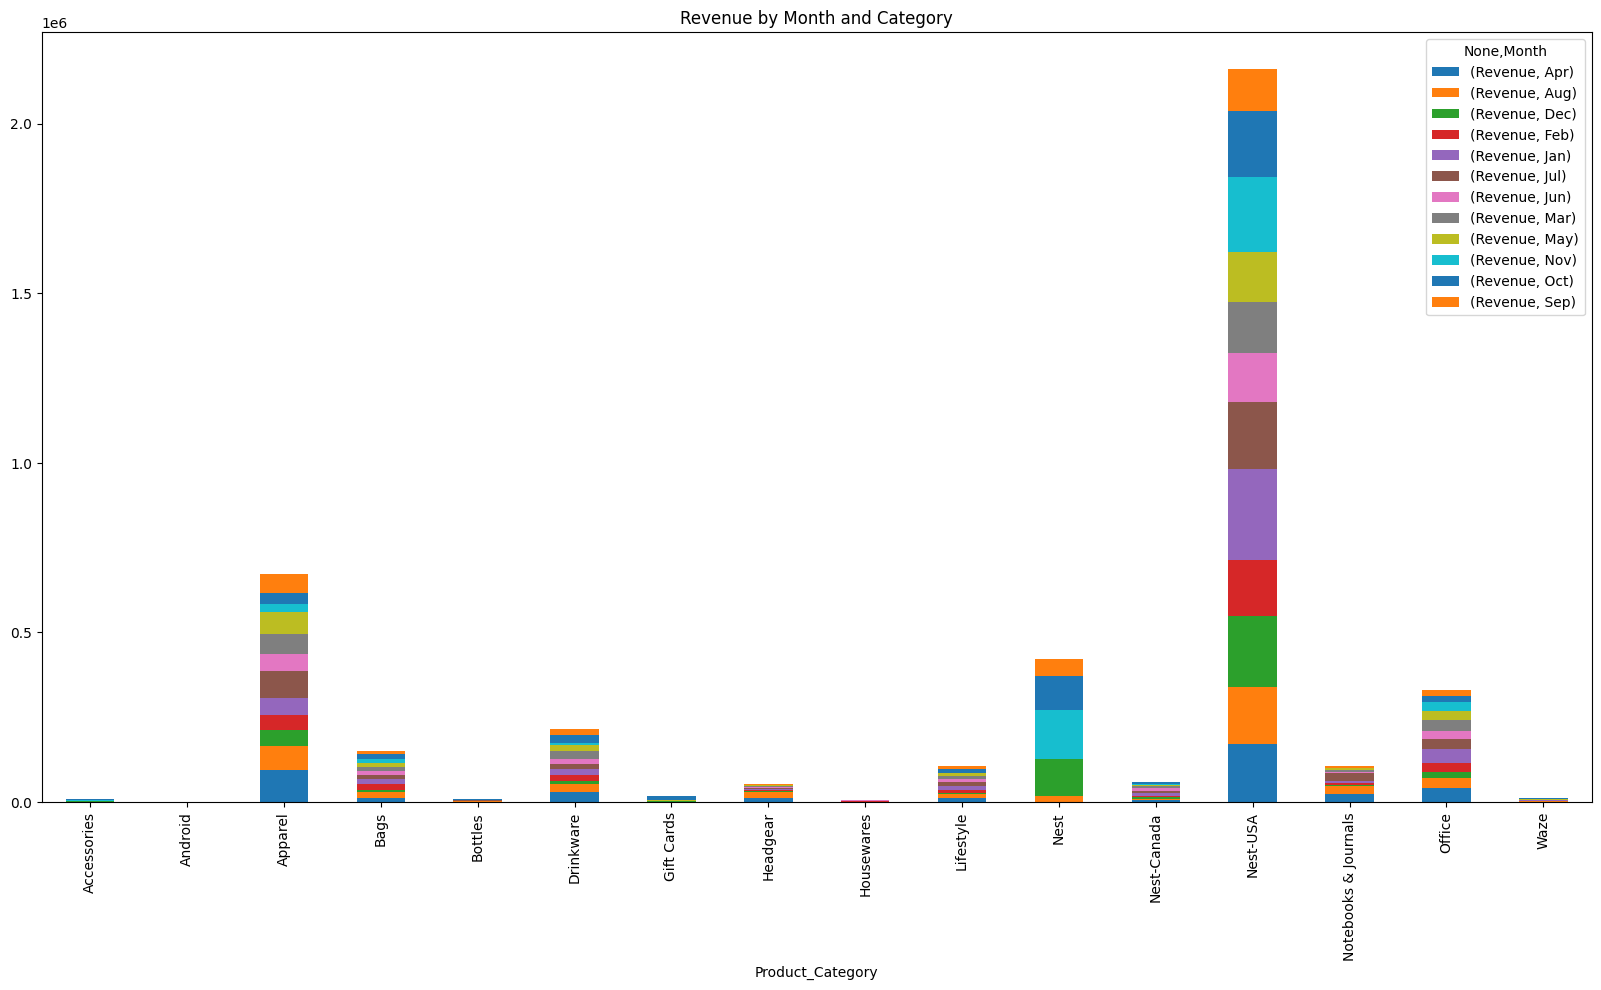

In [238]:
df.groupby(by=['Product_Category','Month'])[['Revenue']].sum().unstack().plot(kind='bar',figsize=[20,10],stacked=True,title='Revenue by Month and Category')
plt.show()

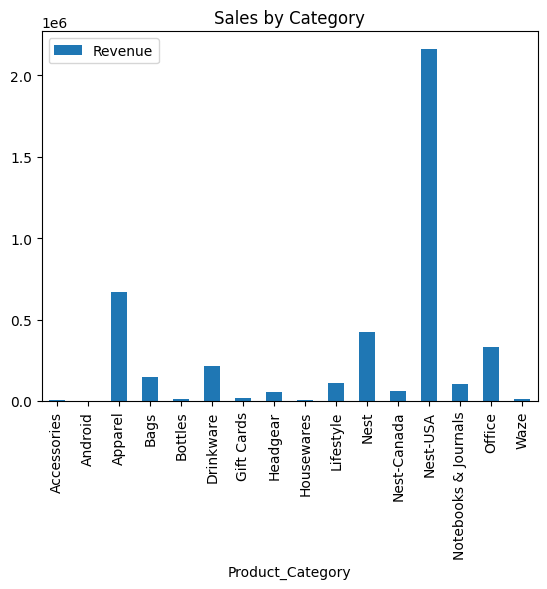

In [239]:
df.groupby(by='Product_Category')[['Revenue']].sum().plot(kind='bar',title='Sales by Category')
plt.show()

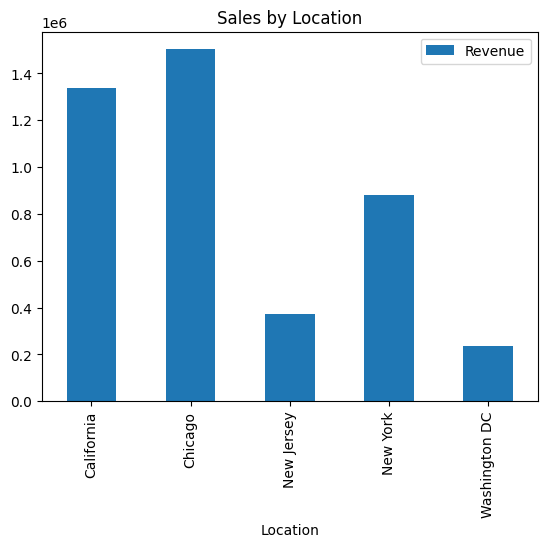

In [240]:
df.groupby(by='Location')[['Revenue']].sum().plot(kind='bar',title='Sales by Location')
plt.show()

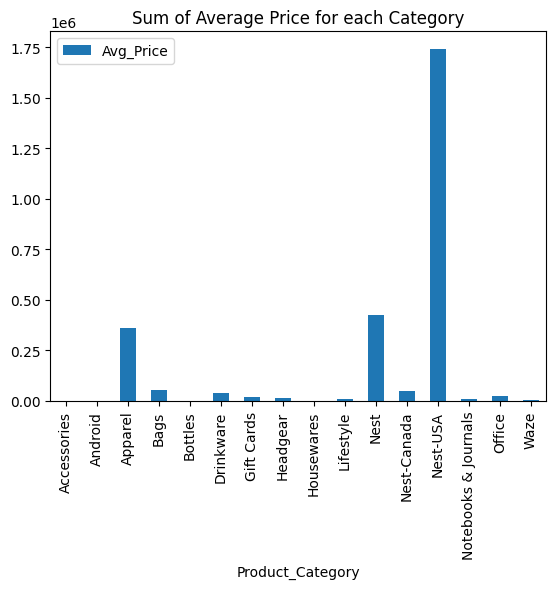

In [241]:
df.groupby(by='Product_Category')[['Avg_Price']].sum().plot(kind='bar',title='Sum of Average Price for each Category')
plt.show()

### 2.7 How number of orders and sales varies by days

C:\Users\tripa\AppData\Local\Temp\ipykernel_24444\3956243782.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sales= pd.DataFrame(df_fin.groupby('Day').agg({"Revenue": sum , 'Quantity': sum})).reset_index()


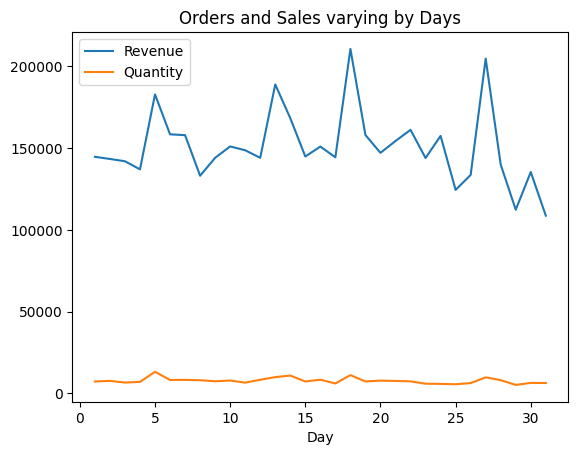

In [242]:
sales= pd.DataFrame(df_fin.groupby('Day').agg({"Revenue": sum , 'Quantity': sum})).reset_index()
sales.plot(x='Day', y= ['Revenue', 'Quantity'], kind ="line",title='Orders and Sales varying by Days')
plt.show()

### 2.8 Calculate the revenue, marketing spend, percentage of marketing spend out of revenue tax, percentages of delivery charges by month.

In [243]:
spend['Month'] = spend.Date.dt.strftime("%b")
spend.head(5)

,Date,Offline_Spend,Online_Spend,Month
0,2019-01-01,4500,2424.50,Jan
1,2019-01-02,4500,3480.36,Jan
2,2019-01-03,4500,1576.38,Jan
3,2019-01-04,4500,2928.55,Jan
4,2019-01-05,4500,4055.30,Jan


In [244]:
Marketing_spend = spend.groupby('Month').agg({'Offline_Spend' : sum, 'Online_Spend' : sum})
Marketing_spend

C:\Users\tripa\AppData\Local\Temp\ipykernel_24444\3791269609.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Marketing_spend = spend.groupby('Month').agg({'Offline_Spend' : sum, 'Online_Spend' : sum})
C:\Users\tripa\AppData\Local\Temp\ipykernel_24444\3791269609.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Marketing_spend = spend.groupby('Month').agg({'Offline_Spend' : sum, 'Online_Spend' : sum})


,Offline_Spend,Online_Spend
Month,,
Apr,96000,61026.83
Aug,85500,57404.15
Dec,122000,76648.75
Feb,81300,55807.92
Jan,96600,58328.95
Jul,67500,52717.85
Jun,80500,53818.14
Mar,73500,48750.09
May,65500,52759.64


In [245]:
revenue_spend=pd.merge(left=df_fin,right=Marketing_spend,on='Month',how='inner')
revenue_spend.head()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Product_Category_Android,Product_Category_Apparel,Product_Category_Bags,...,Product_Description,GST,Month,Transaction_Date,Revenue,Occurence,Day,Week,Offline_Spend,Online_Spend
0,17850,16679,1,153.71,6.5,12,10,False,False,False,...,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10,Jan,2019-01-01,158.6729,New,1,1,96600,58328.95
1,17850,16680,1,153.71,6.5,12,10,False,False,False,...,Nest Learning Thermostat 3rd Gen-USA - Stainle...,10,Jan,2019-01-01,158.6729,Existing,1,1,96600,58328.95
2,17850,16681,1,2.05,6.5,12,10,False,False,False,...,Google Laptop and Cell Phone Stickers,10,Jan,2019-01-01,8.5295,Existing,1,1,96600,58328.95
3,17850,16682,5,17.53,6.5,12,10,False,True,False,...,Google Men's 100% Cotton Short Sleeve Hero Tee...,18,Jan,2019-01-01,99.5843,Existing,1,1,96600,58328.95
4,17850,16682,1,16.50,6.5,12,10,False,False,True,...,Google Canvas Tote Natural/Navy,18,Jan,2019-01-01,24.0230,Existing,1,1,96600,58328.95


In [246]:
revenue_spend['Total_Marketing_Spend'] = revenue_spend.Offline_Spend + revenue_spend.Online_Spend
revenue_spend['%of_marketing_spend_out_of_revenue']= (revenue_spend['Total_Marketing_Spend'] / revenue_spend["Revenue"])*100
revenue_spend.iloc[:,[24,23,22,21,17]]

,Gender_M,Coupon_Status_Used,Coupon_Status_Not Used,Product_Category_Waze,Product_Category_Nest-Canada
0,True,True,False,False,False
1,True,True,False,False,False
2,True,True,False,False,False
3,True,False,True,False,False
4,True,True,False,False,False
...,...,...,...,...,...
52519,False,False,False,False,False
52520,False,True,False,False,False
52521,False,True,False,False,False
52522,False,False,False,False,False


In [247]:
revenue_spend['%of_marketing_spend_out_of_revenue_tax']= (revenue_spend['%of_marketing_spend_out_of_revenue'] / revenue_spend["Discount_pct"])*100
revenue_spend.iloc[:,[25,24,23,22,21,17,16]]

,Location_Chicago,Gender_M,Coupon_Status_Used,Coupon_Status_Not Used,Product_Category_Waze,Product_Category_Nest-Canada,Product_Category_Nest
0,True,True,True,False,False,False,False
1,True,True,True,False,False,False,False
2,True,True,True,False,False,False,False
3,True,True,False,True,False,False,False
4,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...
52519,False,False,False,False,False,False,False
52520,False,False,True,False,False,False,False
52521,False,False,True,False,False,False,False
52522,False,False,False,False,False,False,False


In [248]:
deliverycharges=revenue_spend.groupby(by=['Month'])[['Delivery_Charges']].sum()
deliverycharges

,Delivery_Charges
Month,
Apr,40929.78
Aug,60595.00
Dec,37881.99
Feb,48454.28
Jan,58401.75
Jul,48024.13
Jun,37055.84
Mar,59324.29
May,40745.99


In [249]:
deliverycharges['%of_deliverycharges']=(deliverycharges.Delivery_Charges/revenue_spend.Delivery_Charges.sum())* 100
deliverycharges

,Delivery_Charges,%of_deliverycharges
Month,,
Apr,40929.78,7.437858
Aug,60595.00,11.011470
Dec,37881.99,6.884007
Feb,48454.28,8.805229
Jan,58401.75,10.612907
Jul,48024.13,8.727061
Jun,37055.84,6.733877
Mar,59324.29,10.780553
May,40745.99,7.404460


### 2.9 How marketing spend is impacting on revenue

In [250]:
impact=revenue_spend.groupby(by=['Total_Marketing_Spend','Month'])[['Revenue']].sum().reset_index()
impact

,Total_Marketing_Spend,Month,Revenue
0,118259.64,May,313637.96936
1,120217.85,Jul,419784.20761
2,122250.09,Mar,330923.97143
3,134318.14,Jun,287125.25071
4,135514.54,Sep,320048.22198
5,137107.92,Feb,324330.66720
6,142904.15,Aug,415699.17184
7,151224.65,Oct,448939.11355
8,154928.95,Jan,460087.03245
9,157026.83,Apr,441974.38503


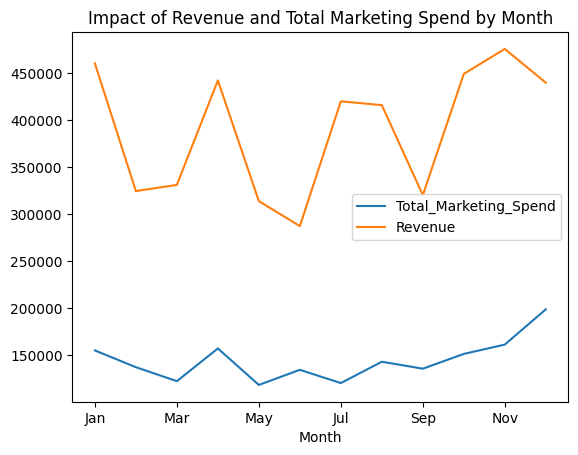

In [251]:
impact.sort_index()
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
impact.index = pd.CategoricalIndex(impact['Month'], categories= sort_order, ordered  = True)
impact =impact.sort_index()
impact.plot(kind ="line",title='Impact of Revenue and Total Marketing Spend by Month')
plt.show()

### 2.10 Which product was appeared in the transactions

In [252]:
df.groupby(by='Product_Category')[['Revenue']].sum().sort_values(by='Revenue',ascending=False).iloc[: :5]

,Revenue
Product_Category,
Nest-USA,2162032.068
Bags,149228.533
Gift Cards,16904.862
Android,977.044


### 2.11 Which product was purcahsed mostly based on the quantity

In [253]:
df.groupby(by=['Product_Category'])[['Quantity']].sum().sort_values(by='Quantity',ascending=False).iloc[::5]

,Quantity
Product_Category,
Office,88383
Bags,15273
Bottles,2090
Android,45


# 3. Performing Customer Segmentation

3.1 Heuristic (Value Based, RFM) - Divide the customers into Premium, Gold, Silver, Standard customers and define strategy on the same.

## Value Based

In [254]:
print('Min Invoice Date:',df_fin.Transaction_Date.dt.date.min(),'max Invoice Date:',df_fin.Transaction_Date.dt.date.max())

Min Invoice Date: 2019-01-01 max Invoice Date: 2019-12-31


In [255]:
snapshot_date = df_fin['Transaction_Date'].max() + dt.timedelta(days=1)
snapshot_date

Timestamp('2020-01-01 00:00:00')

In [256]:
# Calculate RFM metrics
rfm = df_fin.groupby(['CustomerID']).agg({'Transaction_Date': lambda x : (snapshot_date - x.max()).days,
                                      'Transaction_ID':'count','Revenue': 'sum'})
#Function Lambdea: it gives the number of days between hypothetical today and the last transaction

#Rename columns
rfm.rename(columns={'Transaction_Date':'Recency','Transaction_ID':'Frequency','Revenue':'MonetaryValue'}
           ,inplace= True)

#Final RFM values
rfm.reset_index(inplace=True)

In [257]:
rfm

,CustomerID,Recency,Frequency,MonetaryValue
0,12346,108,2,174.98174
1,12347,60,59,12059.17780
2,12348,74,23,1501.92620
3,12350,18,17,1183.71394
4,12356,108,36,1753.45086
...,...,...,...,...
1463,18259,271,6,789.15360
1464,18260,88,39,2573.65633
1465,18269,195,8,155.66092
1466,18277,70,1,301.02000


In [258]:
rfm.MonetaryValue.quantile([0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90])

0.1     196.356922
0.2     529.652430
0.3     867.210490
0.4    1238.271584
0.5    1770.545200
0.6    2351.126848
0.7    3293.116975
0.8    4679.572992
0.9    7290.879999
Name: MonetaryValue, dtype: float64

In [259]:
# Merge the dataframes
df_fin1 = pd.merge(df_fin, rfm, on='CustomerID', how="inner")

# Apply qcut with duplicates='drop' to handle duplicate edges
df_fin1['Deciles'] = pd.qcut(df_fin1['MonetaryValue'], 10, labels=False, duplicates='drop')

# Display the result
df_fin1

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Product_Category_Android,Product_Category_Apparel,Product_Category_Bags,...,Month,Transaction_Date,Revenue,Occurence,Day,Week,Recency,Frequency,MonetaryValue,Deciles
0,17850,16679,1,153.71,6.50,12,10,False,False,False,...,Jan,2019-01-01,158.67290,New,1,1,340,293,37649.28181,9
1,17850,16680,1,153.71,6.50,12,10,False,False,False,...,Jan,2019-01-01,158.67290,Existing,1,1,340,293,37649.28181,9
2,17850,16681,1,2.05,6.50,12,10,False,False,False,...,Jan,2019-01-01,8.52950,Existing,1,1,340,293,37649.28181,9
3,17850,16682,5,17.53,6.50,12,10,False,True,False,...,Jan,2019-01-01,99.58430,Existing,1,1,340,293,37649.28181,9
4,17850,16682,1,16.50,6.50,12,10,False,False,True,...,Jan,2019-01-01,24.02300,Existing,1,1,340,293,37649.28181,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52519,14410,48493,1,121.30,6.50,45,30,False,False,False,...,Dec,2019-12-31,99.90100,Existing,31,1,1,8,891.00257,0
52520,14410,48494,1,48.92,6.50,45,30,False,True,False,...,Dec,2019-12-31,46.90792,Existing,31,1,1,8,891.00257,0
52521,14410,48495,1,151.88,6.50,45,30,False,False,False,...,Dec,2019-12-31,123.44760,Existing,31,1,1,8,891.00257,0
52522,14600,48496,5,80.52,6.50,7,30,False,False,False,...,Dec,2019-12-31,316.50200,New,31,1,1,2,584.49360,0


In [260]:
df_fin1.Deciles.value_counts()

Deciles
8    5310
5    5301
2    5283
7    5283
4    5264
0    5257
1    5250
3    5221
6    5199
9    5156
Name: count, dtype: int64

In [261]:
df_fin1['MonetaryValue'] = pd.to_numeric(df_fin1['MonetaryValue'], errors='coerce')

In [262]:
mean_monetary_value = df_fin1.groupby('Deciles')['MonetaryValue'].mean()

In [263]:
mean_monetary_value

Deciles
0      718.483354
1     1728.015843
2     2657.137879
3     3620.591894
4     4798.405118
5     6202.687091
6     7888.469572
7    10264.006095
8    15385.819210
9    47011.403542
Name: MonetaryValue, dtype: float64

In [264]:
# Key performace variable selection
col_kpi=['MonetaryValue','Recency','Frequency','Quantity',
         'GST']
profiling_output= df_fin1.groupby(['Deciles']).apply(lambda x: x[col_kpi].mean()).T
profiling_output

C:\Users\tripa\AppData\Local\Temp\ipykernel_24444\3791035386.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  profiling_output= df_fin1.groupby(['Deciles']).apply(lambda x: x[col_kpi].mean()).T


Deciles,0,1,2,3,4,5,6,7,8,9
MonetaryValue,718.483354,1728.015843,2657.137879,3620.591894,4798.405118,6202.687091,7888.469572,10264.006095,15385.819210,47011.403542
Recency,158.023207,150.314476,134.604581,126.758858,123.611512,136.996038,119.975380,77.408101,77.014501,57.394686
Frequency,13.811489,24.779429,36.075904,46.575177,58.087006,73.687040,89.699365,119.282037,159.357815,451.896431
Quantity,3.189652,3.968190,4.376869,4.182341,4.658815,4.219958,4.335449,4.529055,6.105273,5.435803
GST,14.353434,14.016190,13.843082,13.529592,13.493921,13.695906,13.535488,13.625970,13.558757,13.781032


### Segmentation

In [265]:
quantiles = df_fin1[['Frequency','MonetaryValue','Recency' ]].quantile(q=[0.33,0.67])
quantiles

,Frequency,MonetaryValue,Recency
0.33,42.0,3430.07800,48.0
0.67,93.0,8368.07927,143.0


In [266]:
df_fin1['r_seg'] = np.where(df_fin1.Recency<=48, 'Active', np.where(df_fin1.Recency<=143, 'At Risk', 'Churn'))
df_fin1['f_seg'] = np.where(df_fin1.Frequency<=42, 1, np.where(df_fin1.Frequency<=93, 2, 3))
df_fin1['m_seg'] = np.where(df_fin1.MonetaryValue<=2882.40, 1, np.where(df_fin1.MonetaryValue<=7275.82, 2, 3))
df_fin1.head()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Product_Category_Android,Product_Category_Apparel,Product_Category_Bags,...,Occurence,Day,Week,Recency,Frequency,MonetaryValue,Deciles,r_seg,f_seg,m_seg
0,17850,16679,1,153.71,6.5,12,10,False,False,False,...,New,1,1,340,293,37649.28181,9,Churn,3,3
1,17850,16680,1,153.71,6.5,12,10,False,False,False,...,Existing,1,1,340,293,37649.28181,9,Churn,3,3
2,17850,16681,1,2.05,6.5,12,10,False,False,False,...,Existing,1,1,340,293,37649.28181,9,Churn,3,3
3,17850,16682,5,17.53,6.5,12,10,False,True,False,...,Existing,1,1,340,293,37649.28181,9,Churn,3,3
4,17850,16682,1,16.50,6.5,12,10,False,False,True,...,Existing,1,1,340,293,37649.28181,9,Churn,3,3


In [267]:
df_fin1['fm_seg'] = np.where(((df_fin1.f_seg == 3) & (df_fin1.m_seg ==3)) , 'Platinum',
                          np.where((((df_fin1.f_seg == 3) & (df_fin1.m_seg ==2)) | ((df_fin1.f_seg == 2) & (df_fin1.m_seg ==3))) , 'Gold',
                          np.where((((df_fin1.f_seg == 1) & (df_fin1.m_seg ==3)) | ((df_fin1.f_seg == 3) & (df_fin1.m_seg ==1)) | ((df_fin1.f_seg == 2) & (df_fin1.m_seg ==2))), 'Silver', 'Standard' )))
df_fin1.head()

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Product_Category_Android,Product_Category_Apparel,Product_Category_Bags,...,Day,Week,Recency,Frequency,MonetaryValue,Deciles,r_seg,f_seg,m_seg,fm_seg
0,17850,16679,1,153.71,6.5,12,10,False,False,False,...,1,1,340,293,37649.28181,9,Churn,3,3,Platinum
1,17850,16680,1,153.71,6.5,12,10,False,False,False,...,1,1,340,293,37649.28181,9,Churn,3,3,Platinum
2,17850,16681,1,2.05,6.5,12,10,False,False,False,...,1,1,340,293,37649.28181,9,Churn,3,3,Platinum
3,17850,16682,5,17.53,6.5,12,10,False,True,False,...,1,1,340,293,37649.28181,9,Churn,3,3,Platinum
4,17850,16682,1,16.50,6.5,12,10,False,False,True,...,1,1,340,293,37649.28181,9,Churn,3,3,Platinum


In [268]:
df_fin1[(df_fin1.r_seg=='Active') & (df_fin1.fm_seg == 'Platinum')]

,CustomerID,Transaction_ID,Quantity,Avg_Price,Delivery_Charges,Tenure_Months,Discount_pct,Product_Category_Android,Product_Category_Apparel,Product_Category_Bags,...,Day,Week,Recency,Frequency,MonetaryValue,Deciles,r_seg,f_seg,m_seg,fm_seg
104,15311,16748,1,153.71,6.50,40,10,False,False,False,...,2,1,13,583,75420.96390,9,Active,3,3,Platinum
105,15311,16749,1,24.75,6.50,40,10,False,True,False,...,2,1,13,583,75420.96390,9,Active,3,3,Platinum
106,15311,16749,1,2.05,6.50,40,10,False,False,False,...,2,1,13,583,75420.96390,9,Active,3,3,Platinum
107,15311,16749,1,2.05,6.50,40,10,False,False,False,...,2,1,13,583,75420.96390,9,Active,3,3,Platinum
108,15311,16750,1,61.89,6.50,40,10,False,True,False,...,2,1,13,583,75420.96390,9,Active,3,3,Platinum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52485,14606,48465,1,151.88,6.50,33,30,False,False,False,...,31,1,1,570,56467.10347,9,Active,3,3,Platinum
52486,14606,48466,3,80.52,6.50,33,30,False,False,False,...,31,1,1,570,56467.10347,9,Active,3,3,Platinum
52487,14606,48467,1,151.88,12.99,33,30,False,False,False,...,31,1,1,570,56467.10347,9,Active,3,3,Platinum
52488,14606,48467,5,80.52,12.99,33,30,False,False,False,...,31,1,1,570,56467.10347,9,Active,3,3,Platinum


In [269]:
profiling_output= df_fin1.groupby(['r_seg', 'fm_seg']).apply(lambda x: x[col_kpi].mean()).T
profiling_output

C:\Users\tripa\AppData\Local\Temp\ipykernel_24444\1350561894.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  profiling_output= df_fin1.groupby(['r_seg', 'fm_seg']).apply(lambda x: x[col_kpi].mean()).T


r_seg               Active                                          \
fm_seg                Gold      Platinum       Silver     Standard   
MonetaryValue  9424.748267  27102.486055  5244.590632  2332.555863   
Recency          27.629968     20.653757    25.787227    24.026910   
Frequency        79.990407    280.913989    58.255126    25.951466   
Quantity          7.365464      4.613928     3.394622     3.692215   
GST              13.026953     13.645082    13.153277    12.741951   

r_seg              At Risk                                          \
fm_seg                Gold      Platinum       Silver     Standard   
MonetaryValue  8339.771123  22249.181829  4932.801790  2144.039642   
Recency          93.074534     91.336056    94.021792    97.895025   
Frequency        87.237154    231.210106    64.225989    27.354932   
Quantity          4.717109      4.516147     3.552260     4.355616   
GST              13.264257     13.955737    13.868039    13.959480   

r_seg                Churn                                          
fm_seg                Gold      Platinum       Silver     Standard  
MonetaryValue  8161.314806  14677.170859  4990.478793  1927.751457  
Recency         249.607239    226.923178   234.536985   232.644707  
Frequency        83.812332    157.007902    63.029103    24.287995  
Quantity          6.814343      4.403863     4.935934     4.397753  
GST              13.745308     14.085601    14.076597    14.182377

# 4. Cohort Analysis 

In [270]:
def get_month(x) : return dt.datetime(x.year,x.month,1)
df['InvoiceMonth'] = df['Transaction_Date'].apply(get_month)
grouping = df.groupby('CustomerID')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')
df.tail()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Gender,Location,Tenure_Months,GST,Month,Coupon_Code,Discount_pct,Revenue,InvoiceMonth,CohortMonth
52519,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,F,New York,45,10,Dec,ELEC30,30,92.510,2019-12-01,2019-12-01
52520,14410,48494,2019-12-31,GGOEGAEB091117,Google Zip Hoodie Black,Apparel,1,48.92,6.50,Used,F,New York,45,18,Dec,SALE30,30,41.924,2019-12-01,2019-12-01
52521,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,F,New York,45,10,Dec,ELEC30,30,113.916,2019-12-01,2019-12-01
52522,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,F,California,7,10,Dec,ELEC30,30,289.420,2019-12-01,2019-12-01
52523,14600,48497,2019-12-31,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,4,80.52,19.99,Clicked,F,California,7,10,Dec,ELEC30,30,246.546,2019-12-01,2019-12-01


In [271]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(df,'InvoiceMonth')
cohort_year,cohort_month,_ = get_month_int(df,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df['CohortIndex'] = year_diff * 12 + month_diff + 1 

In [272]:
#Count monthly active customers from each cohort
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,215.0,13.0,24.0,34.0,23.0,44.0,35.0,47.0,23.0,28.0,20.0,34.0
2019-02-01,96.0,7.0,9.0,16.0,17.0,22.0,19.0,15.0,12.0,11.0,16.0,NaN
2019-03-01,177.0,18.0,35.0,25.0,32.0,33.0,22.0,22.0,15.0,19.0,NaN,NaN
2019-04-01,163.0,14.0,24.0,24.0,18.0,15.0,10.0,16.0,12.0,NaN,NaN,NaN
2019-05-01,112.0,12.0,9.0,13.0,10.0,13.0,14.0,8.0,NaN,NaN,NaN,NaN
2019-06-01,137.0,20.0,22.0,12.0,11.0,14.0,11.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,93.0,12.0,4.0,5.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,136.0,14.0,16.0,11.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,78.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [273]:
# Retention table
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage 

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,100.0,6.0,11.2,15.8,10.7,20.5,16.3,21.9,10.7,13.0,9.3,15.8
2019-02-01,100.0,7.3,9.4,16.7,17.7,22.9,19.8,15.6,12.5,11.5,16.7,NaN
2019-03-01,100.0,10.2,19.8,14.1,18.1,18.6,12.4,12.4,8.5,10.7,NaN,NaN
2019-04-01,100.0,8.6,14.7,14.7,11.0,9.2,6.1,9.8,7.4,NaN,NaN,NaN
2019-05-01,100.0,10.7,8.0,11.6,8.9,11.6,12.5,7.1,NaN,NaN,NaN,NaN
2019-06-01,100.0,14.6,16.1,8.8,8.0,10.2,8.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,12.9,4.3,5.4,10.8,8.6,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,10.3,11.8,8.1,6.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,100.0,7.7,3.8,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


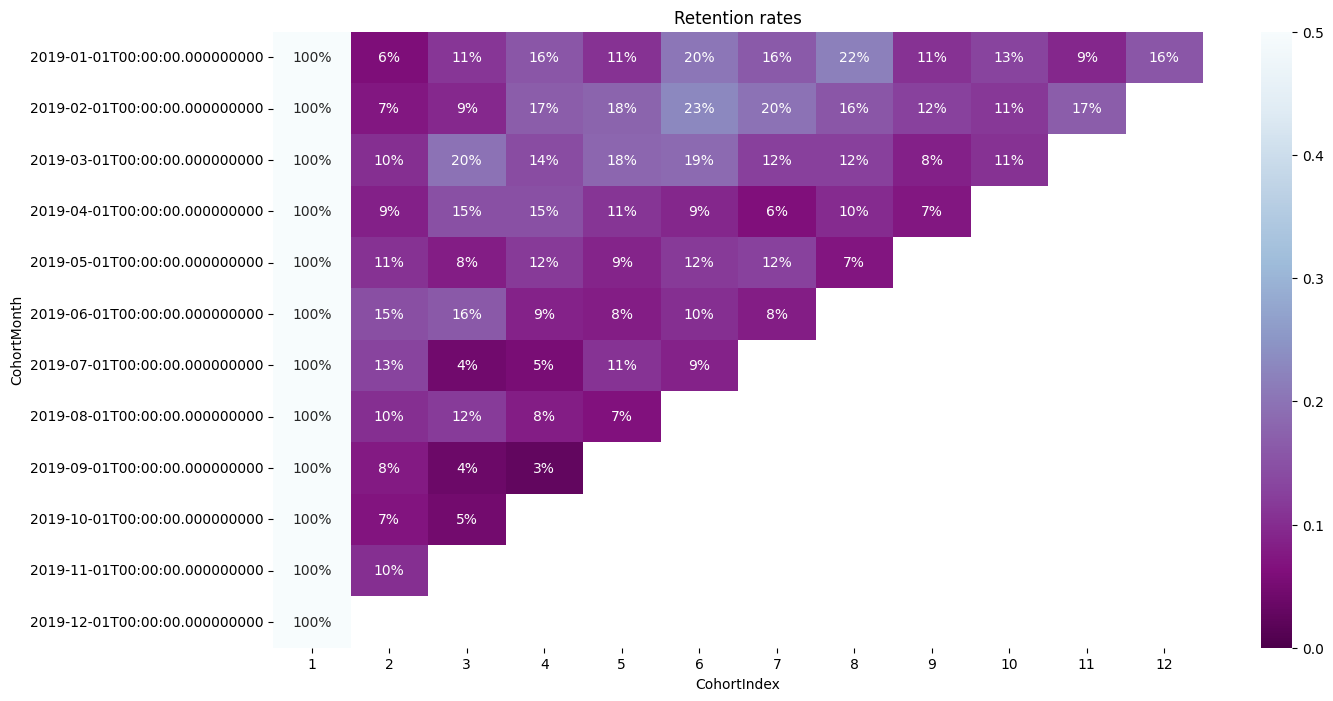

In [274]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()